Load libraries and set up environment

In [1]:
import sympy
sympy.init_printing()

We consider two gravitating point objects with masses $M_1$ and $M_2$, separated by a distance $a$. The orbital frequency is given by $\Omega = \sqrt{G \left(M_1 + M_2\right)/a^3}$.

The energy is given by

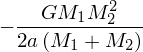

In [6]:
M_1 = sympy.Symbol('M_1', positive=True)
M_2 = sympy.Symbol('M_2', positive=True)
a = sympy.Symbol('a', positive=True)
Omega = sympy.Symbol('Omega', positive=True) # Orbital frequency
G = sympy.Symbol('G', positive=True) # Gravitation constant
temp = -G*M_1*M_2/a + M_1*(Omega*a*M_2/(M_1+M_2))**2/2 + M_2*(Omega*a*M_1/(M_1+M_2))**2
temp = temp.subs(Omega, sympy.sqrt(G*(M_1+M_2)/a**3))
before_energy = temp.simplify()
before_energy

The angular momentum is given by

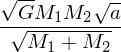

In [11]:
temp = M_1*Omega*(a*M_2/(M_1+M_2))**2 + M_2*Omega*(a*M_1/(M_1+M_2))**2
temp = temp.subs(Omega, sympy.sqrt(G*(M_1+M_2)/a**3))
before_angular_momentum = temp.simplify()
before_angular_momentum

Now suppose that body $M_1$ undergoes an explosion. This explosion has two effects which change the orbit. First, $M_1$ expels some of its mass, so the mass of the remaining body is $\chi M_1$. Second, $M_1$ receives a kick. The magnitude of the kick velocity is $v_n$ (where subscript $n$ stands for natal kick, instead of subscript $k$, which might be confused with the Keplerian velocity). We denote the angle between the kick velocity and the angular momentum by $\theta$, and the angle between the kick velocity and the orbital velocity before the explosion, in the plane of motion, by $\phi$. We proceed to calculate the new energy and angular momentum.

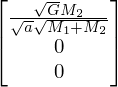

In [16]:
before_velocity_vector = sympy.Matrix([Omega*a*M_2/(M_1+M_2),0,0]).subs(Omega, sympy.sqrt(G*(M_1+M_2)/a**3))
before_velocity_vector

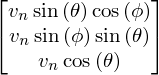

In [21]:
v_n = sympy.Symbol('v_n', positive=True)
theta = sympy.Symbol('theta', positive=True)
phi = sympy.Symbol('phi', positive=True)
kick_velocity_vector = v_n*sympy.Matrix([sympy.sin(theta)*sympy.cos(phi), 
                                         sympy.sin(theta)*sympy.sin(phi), 
                                         sympy.cos(theta)])
kick_velocity_vector

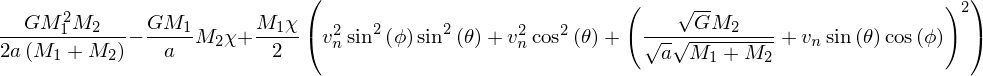

In [32]:
after_velocity_vector = before_velocity_vector+kick_velocity_vector
chi = sympy.Symbol('chi', positive=True)
temp = -G*M_1*M_2*chi/a + M_2*(Omega*a*M_1/(M_1+M_2))**2/2 + after_velocity_vector.dot(after_velocity_vector)*chi*M_1/2
temp = temp.subs(Omega, sympy.sqrt(G*(M_1+M_2)/a**3))
after_energy = temp
after_energy

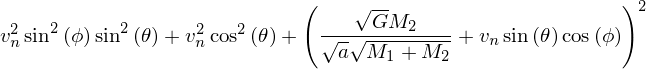

In [29]:
after_velocity_vector.dot(after_velocity_vector)

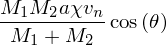

In [39]:
after_L_x = chi*M_1*after_velocity_vector[2]*a*M_2/(M_1+M_2)
after_L_x

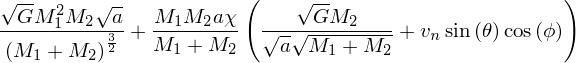

In [42]:
temp = chi*M_1*after_velocity_vector[0]*a*M_2/(M_1+M_2) + M_2*Omega*(a*M_1/(M_1+M_2))**2
temp = temp.subs(Omega, sympy.sqrt(G*(M_1+M_2)/a**3))
after_L_z = temp
after_L_z

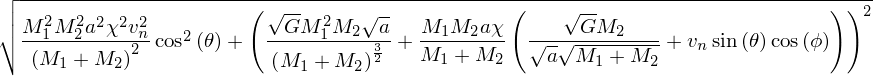

In [43]:
after_angular_momentum = sympy.sqrt(after_L_x**2 + after_L_z**2)
after_angular_momentum

# Keplerian orbit parameters

We begin with a short derivation of the Keplerian orbit parameters. The vector equations of motion for the two masses are

$\ddot{\mathbf{R}}_1 = \frac{G M_2}{|\mathbf{R}_2 - \mathbf{R}_1|^3} \left(\mathbf{R}_2 - \mathbf{R}_1 \right)$

$\ddot{\mathbf{R}}_2 = -\frac{G M_1}{|\mathbf{R}_2 - \mathbf{R}_1|^3} \left(\mathbf{R}_2 - \mathbf{R}_1 \right)$

We don't care about centre of mass motion, so $M_1 \mathbf{R}_1 + M_2 \mathbf{R}_2 = 0$. We want to express the equation of motion in terms of the difference between the two position vectors $\mathbf{r} = \mathbf{R}_2 - \mathbf{R}_1$. Expressing the two positions in terms of the position difference


$\mathbf{R}_1 = -\frac{M_2}{M_1 + M_2} \mathbf{r}$

$\mathbf{R}_2 = \frac{M_1}{M_1+M_2} \mathbf{r}$

Substituting into either equation of motion yields

$\ddot{\mathbf{r}} = - \frac{G \left(M_1 + M_2 \right)}{r^3} \mathbf{r}$

This substitution reduces the problem to the degenerate Kepler problem, where a test particle goes around a much more massive body with mass $M_1 + M_2$. The solution is

$r = \frac{r_l}{1 + e \cos \theta}$

Conservation of angular momentum

$L = M_1 R_1^2 \dot{\theta} + M_2 R_2^2 \dot{\theta}$

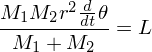

In [56]:
R_1 = sympy.Symbol('R_1', positive=True)
R_2 = sympy.Symbol('R_2', positive=True)
r = sympy.Symbol('r', positive=True)
L = sympy.Symbol('L', positive=True)
t = sympy.Symbol('t', positive=True)
temp = M_1*R_1**2*sympy.Derivative(theta,t)+M_2*R_2**2*sympy.Derivative(theta,t)
temp = temp.subs(R_1, -r*M_2/(M_1+M_2))
temp = temp.subs(R_2, r*M_1/(M_1+M_2))
temp = temp.simplify()
keplerian_angular_momentum = sympy.Eq(temp,L)
keplerian_angular_momentum

Energy conservation

$U = - \frac{G M_1 M_2}{r} + \frac{1}{2} M_1 \left(\dot{R}_1^2 +  R_1^2 \dot{\theta}^2 \right) + \frac{1}{2} M_2 \left( \dot{R}_2^2 + R_2^2 \dot{\theta}^2 \right)$

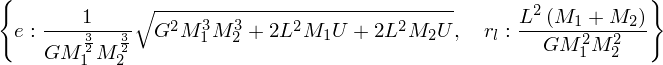

In [81]:
e = sympy.Symbol('e', positive=True)
r_l = sympy.Symbol('r_l', positive=True)
U = sympy.Symbol('U')
temp = (-G*M_1*M_2/r+
        M_1*(sympy.Derivative(R_1,t)**2+R_1**2*sympy.Derivative(theta,t)**2)/2+
        M_2*(sympy.Derivative(R_2,t)**2+R_2**2*sympy.Derivative(theta,t)**2)/2)
temp = temp.subs(sympy.Derivative(R_1, t), sympy.Derivative(R_1, theta)*sympy.Derivative(theta, t))
temp = temp.subs(sympy.Derivative(R_2, t), sympy.Derivative(R_2, theta)*sympy.Derivative(theta, t))
temp = temp.subs(sympy.solve(keplerian_angular_momentum, sympy.Derivative(theta, t), dict=True)[0])
temp = temp.subs(R_1, -r*M_2/(M_1+M_2))
temp = temp.subs(R_2, r*M_1/(M_1+M_2))
temp = temp.subs(r, r_l/(1+e*sympy.cos(theta)))
temp = temp.doit()
temp = sympy.Eq(U, temp.simplify())
keplerian_orbit_parameters = sympy.solve([temp.subs(theta,0), temp.subs(theta, sympy.pi/2)], [e, r_l], dict=True)[1]
keplerian_orbit_parameters

The semi major axis is given by $a = \frac{r_l}{1-e^2}$